In [ ]:
#Importation des bibliotheques

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression 
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score



In [4]:
#Importation de la Dataset

df=pd.read_csv('C:/Users/THINKPAD L15/Desktop/PYTHON/machine learning/Data/ENB2012_data.csv')


In [5]:
print("Informations sur le dataset :")
df.info()
print("\nDimensions :", df.shape)
print("\nStatistiques descriptives :")
print(df.describe())
print("Afficher les premieres lignes ")
df.head()

Informations sur le dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   X1           768 non-null    float64
 1   X2           768 non-null    float64
 2   X3           768 non-null    float64
 3   X4           768 non-null    float64
 4   X5           768 non-null    float64
 5   X6           768 non-null    float64
 6   X7           768 non-null    float64
 7   X8           768 non-null    float64
 8   Y1           768 non-null    float64
 9   Y2           768 non-null    float64
 10  Unnamed: 10  0 non-null      float64
 11  Unnamed: 11  0 non-null      float64
dtypes: float64(12)
memory usage: 121.6 KB

Dimensions : (1296, 12)

Statistiques descriptives :
               X1          X2          X3          X4         X5          X6  \
count  768.000000  768.000000  768.000000  768.000000  768.00000  768.000000   
mean     0.764167 

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2,Unnamed: 10,Unnamed: 11
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.33,NaN,NaN
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55,21.33,NaN,NaN
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55,21.33,NaN,NaN
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55,21.33,NaN,NaN
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84,28.28,NaN,NaN


In [6]:
#Suppression des colonnes inutiles

df = df.drop(df.columns[-2:], axis=1)


In [7]:
#Suppression des lignes vides

df.isna().sum()


X1    528
X2    528
X3    528
X4    528
X5    528
X6    528
X7    528
X8    528
Y1    528
Y2    528
dtype: int64

In [8]:
df.dropna(inplace=True)
df.isna().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

In [9]:
#Renommage des colonnes

df.columns = ['relative_compactness', 'surface_area', 'wall_area', 'roof_area', 'overall_height',
                'orientation', 'glazing_area', 'glazing_area_distribution', 'heating_load', 'cooling_load']


Statistiques descriptives :
       relative_compactness  surface_area   wall_area   roof_area  \
count            768.000000    768.000000  768.000000  768.000000   
mean               0.764167    671.708333  318.500000  176.604167   
std                0.105777     88.086116   43.626481   45.165950   
min                0.620000    514.500000  245.000000  110.250000   
25%                0.682500    606.375000  294.000000  140.875000   
50%                0.750000    673.750000  318.500000  183.750000   
75%                0.830000    741.125000  343.000000  220.500000   
max                0.980000    808.500000  416.500000  220.500000   

       overall_height  orientation  glazing_area  glazing_area_distribution  \
count       768.00000   768.000000    768.000000                  768.00000   
mean          5.25000     3.500000      0.234375                    2.81250   
std           1.75114     1.118763      0.133221                    1.55096   
min           3.50000     2.00000

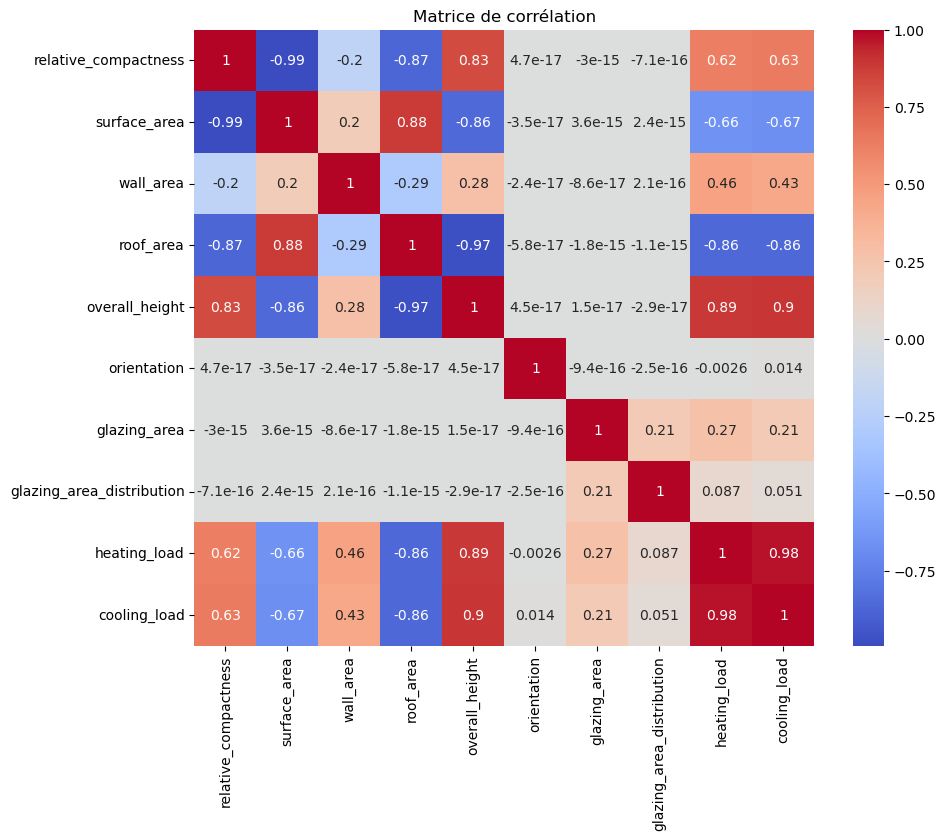

In [10]:
#Analyse Exploratoire 

print("\nStatistiques descriptives :")
print(df.describe())

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation")
plt.show()



 Corrélation avec les cibles :
                           heating_load  cooling_load
heating_load                   1.000000      0.975862
cooling_load                   0.975862      1.000000
overall_height                 0.889431      0.895785
relative_compactness           0.622272      0.634339
wall_area                      0.455671      0.427117
glazing_area                   0.269841      0.207505
glazing_area_distribution      0.087368      0.050525
orientation                   -0.002587      0.014290
surface_area                  -0.658120     -0.672999
roof_area                     -0.861828     -0.862547


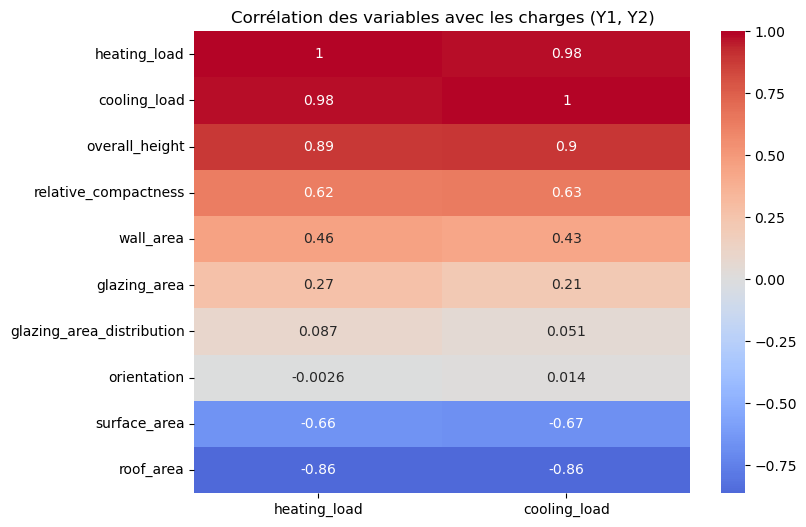

In [11]:
# Corrélation entre features et cibles

corr = df.corr()
target_corr = corr[['heating_load', 'cooling_load']].sort_values(by='heating_load', ascending=False)
print("\n Corrélation avec les cibles :")
print(target_corr)

plt.figure(figsize=(8, 6))
sns.heatmap(target_corr, annot=True, cmap='coolwarm', center=0)
plt.title("Corrélation des variables avec les charges (Y1, Y2)")
plt.show()


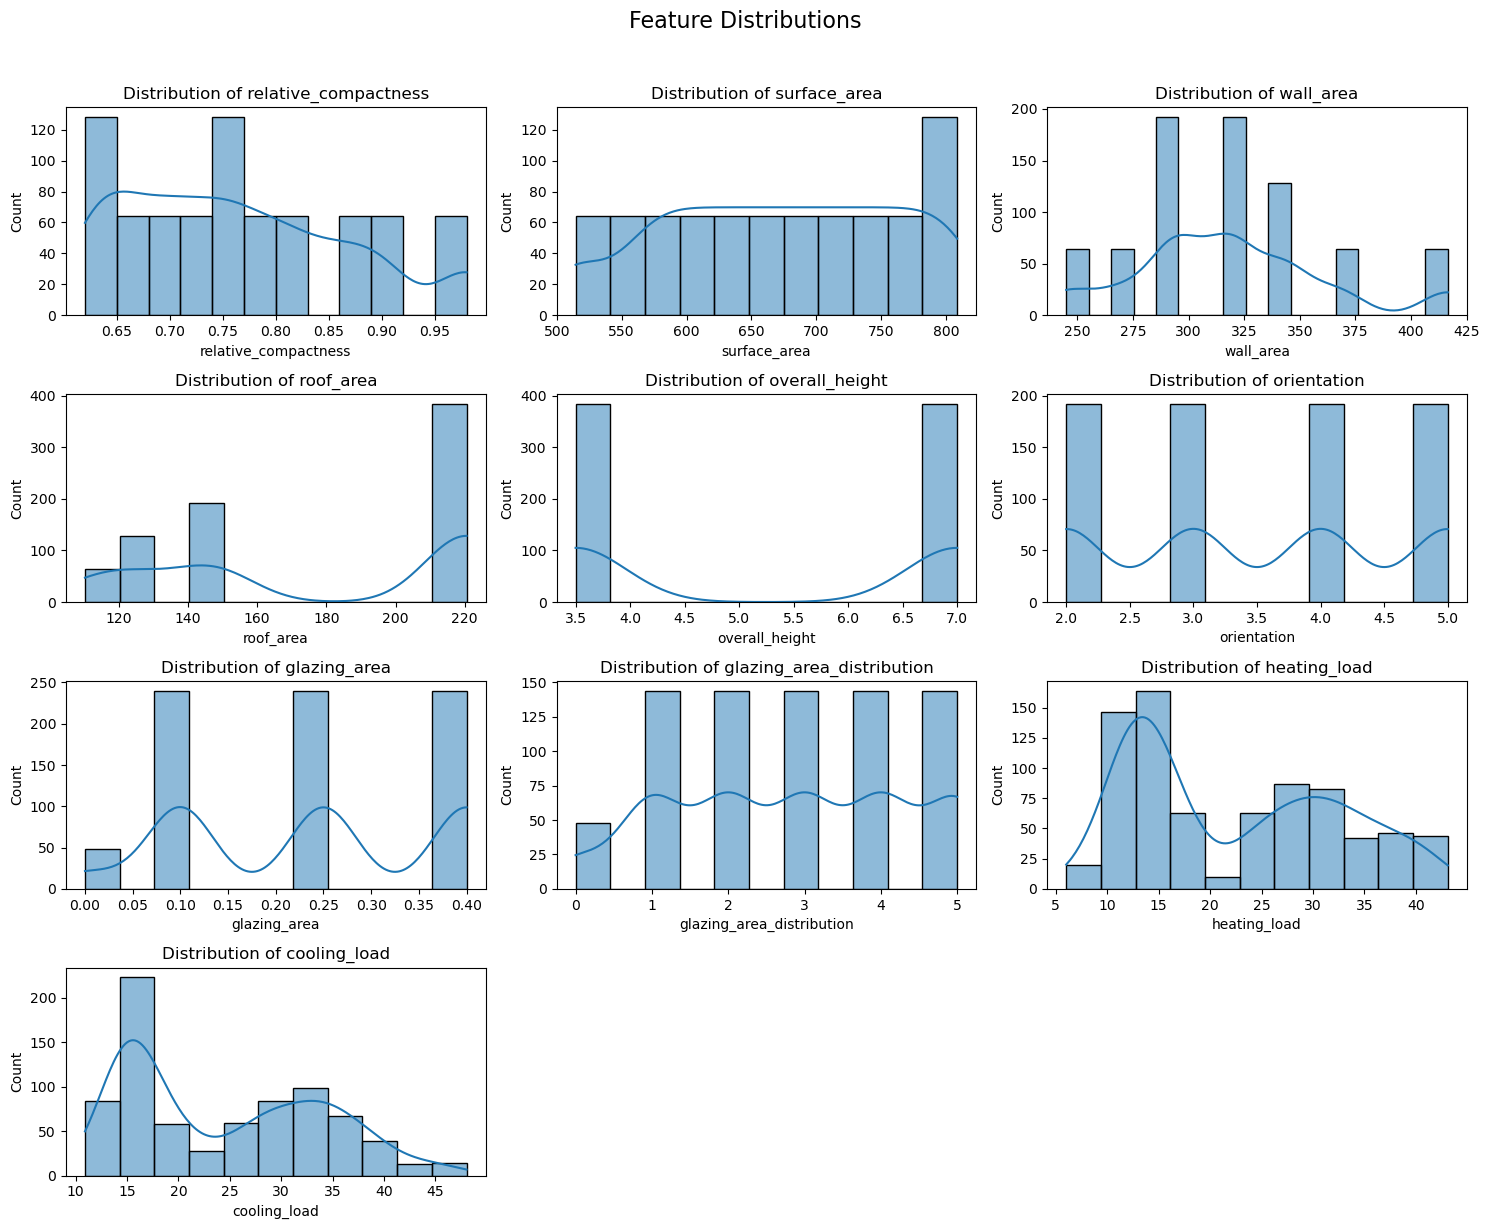

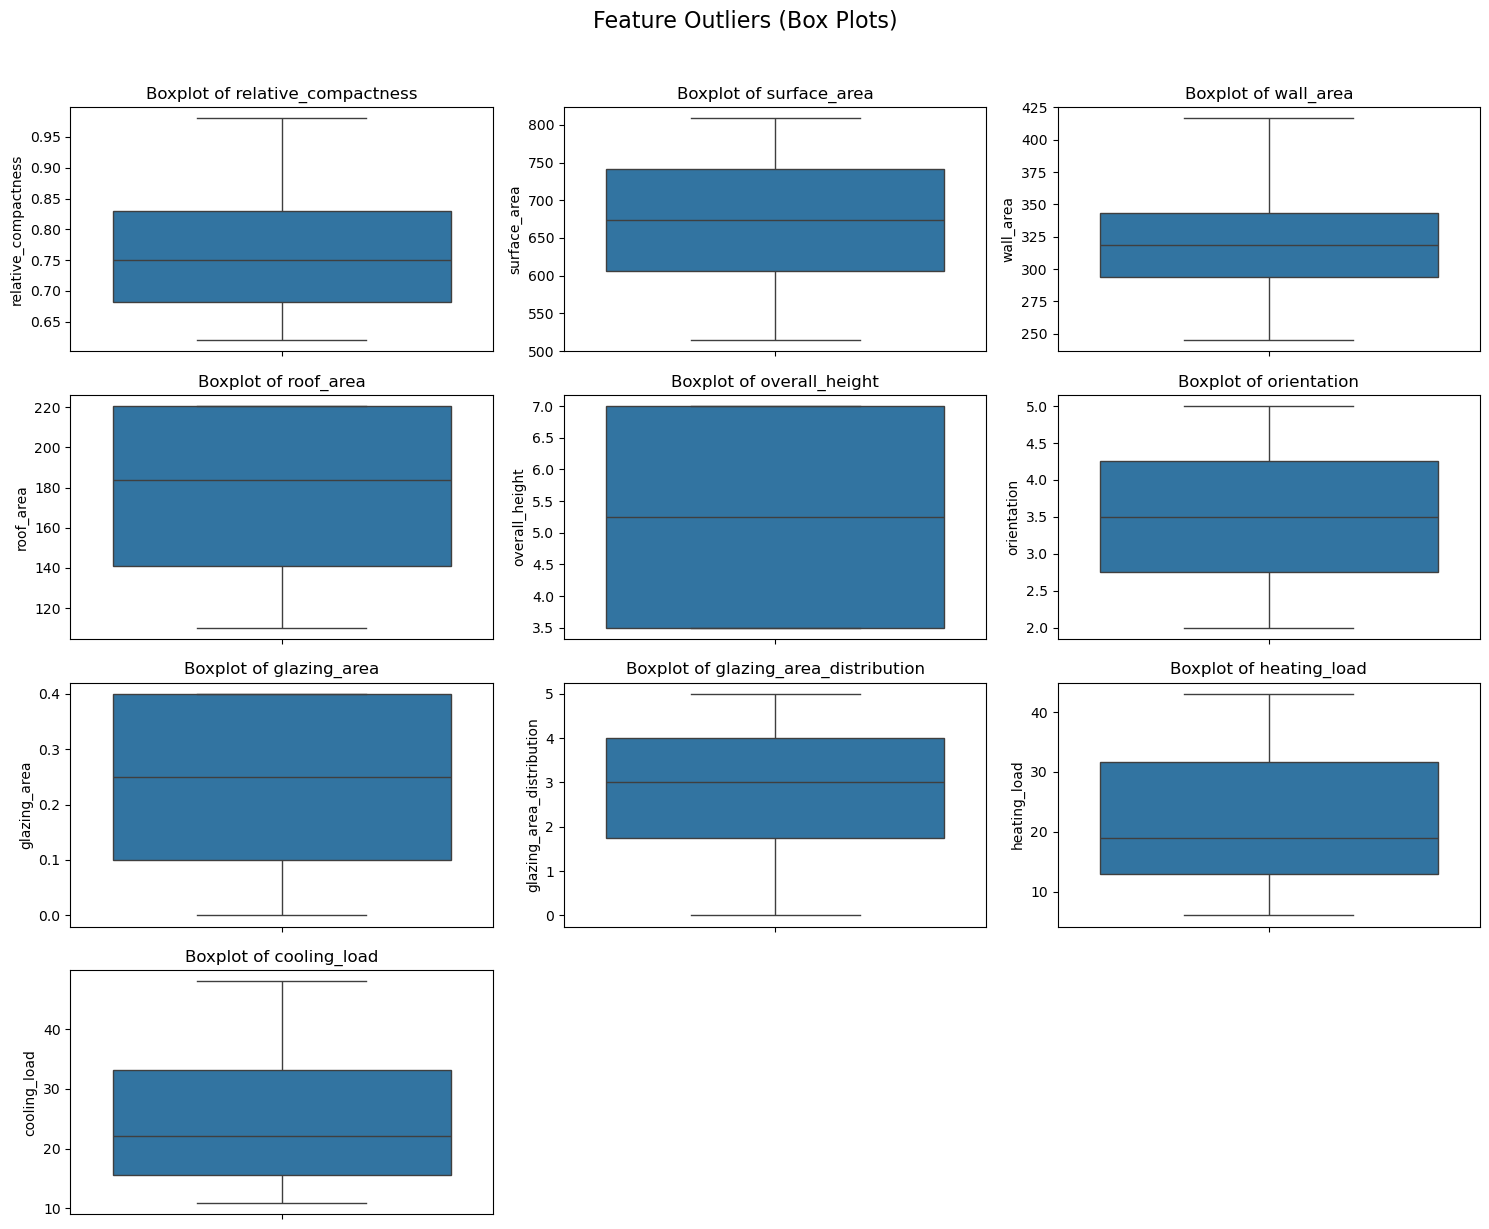

In [ ]:
# histograms pour chaque caracteristique 
plt.figure(figsize=(15, 12))
plt.suptitle("Feature Distributions", y=1.02, fontsize=16)  

for i, column in enumerate(df.columns):
    plt.subplot(4, 3, i+1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.tight_layout()

plt.show()

# Box plots pour chaque caracteristique
plt.figure(figsize=(15, 12))
plt.suptitle("Feature Outliers (Box Plots)", y=1.02, fontsize=16)  

for i, column in enumerate(df.columns):
    plt.subplot(4, 3, i+1)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')
    plt.tight_layout()

plt.show()

In [16]:
#Preparation des données 

X = df.drop(columns=['heating_load', 'cooling_load'])
Y = df[['heating_load', 'cooling_load']]

In [17]:
# Standardisation 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
#Split

X_train, X_test, Y_train, Y_test = train_test_split(X ,Y, test_size=0.20, random_state=42)

print(f"Taille de l'ensemble d'entraînement (80%): {len(X_train)} observations")
print(f"Taille de l'ensemble de test (20%): {len(X_test)} observations")

Taille de l'ensemble d'entraînement (80%): 614 observations
Taille de l'ensemble de test (20%): 154 observations


In [ ]:
#Modeles

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01, max_iter=10000)
}

# DataFrame pour stocker les résultats
results = pd.DataFrame(columns=["Model", "Target", "R2", "MSE"])

for model_name, model in models.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    
    for i, col in enumerate(Y_train.columns):
        r2 = r2_score(Y_test.iloc[:, i], Y_pred[:, i])
        mse = mean_squared_error(Y_test.iloc[:, i], Y_pred[:, i])
        results = pd.concat([results, pd.DataFrame({
            "Model": [model_name],
            "Target": [col],
            "R2": [r2],
            "MSE": [mse]
        })])

print(results)

               Model        Target        R2        MSE
0  Linear Regression  heating_load  0.912101   9.161867
0  Linear Regression  cooling_load  0.893324   9.884280
0   Ridge Regression  heating_load  0.907384   9.653457
0   Ridge Regression  cooling_load  0.888349  10.345299
0   Lasso Regression  heating_load  0.906526   9.742930
0   Lasso Regression  cooling_load  0.887456  10.428024


C:\Users\THINKPAD L15\AppData\Local\Temp\ipykernel_24908\1255581316.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame({


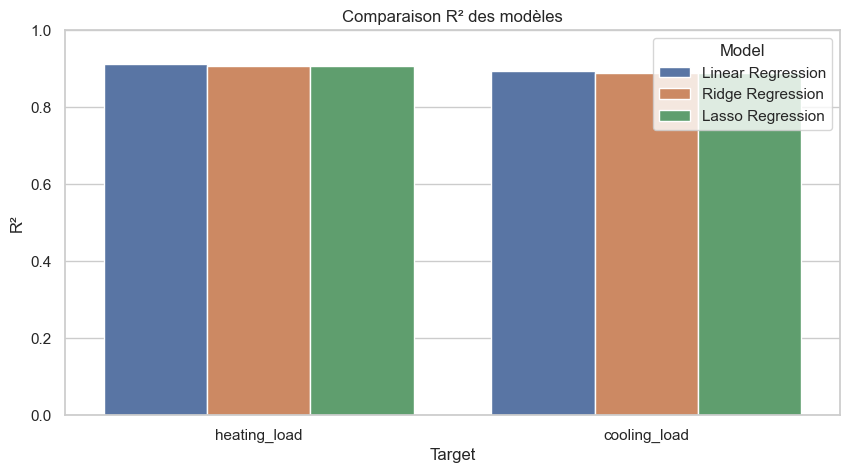

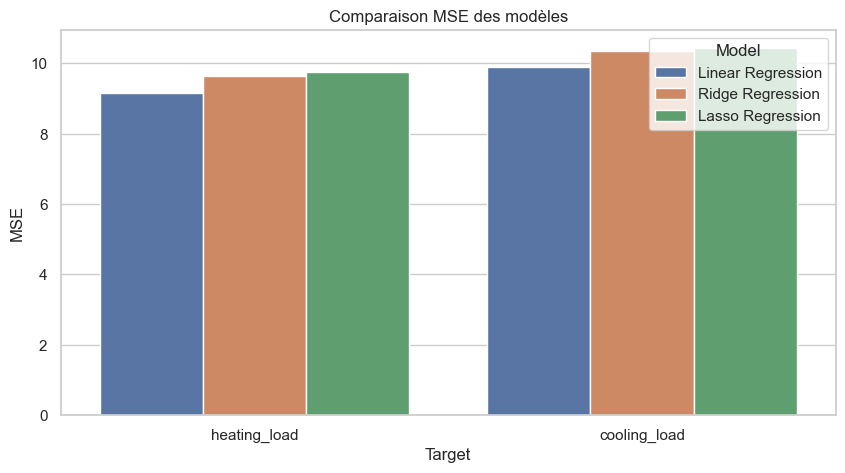

In [45]:
# Style
sns.set(style="whitegrid")

# R²
plt.figure(figsize=(10, 5))
sns.barplot(data=results, x="Target", y="R2", hue="Model")
plt.title("Comparaison R² des modèles")
plt.ylim(0, 1)  # R² varie entre 0 et 1
plt.ylabel("R²")
plt.xlabel("Target")
plt.legend(title="Model")
plt.show()

# MSE
plt.figure(figsize=(10, 5))
sns.barplot(data=results, x="Target", y="MSE", hue="Model")
plt.title("Comparaison MSE des modèles")
plt.ylabel("MSE")
plt.xlabel("Target")
plt.legend(title="Model")
plt.show()

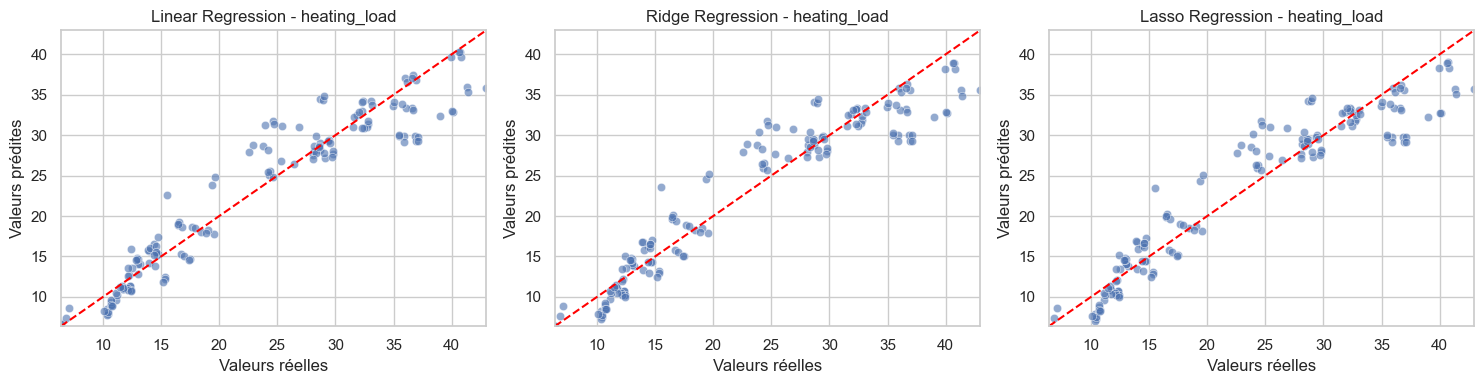

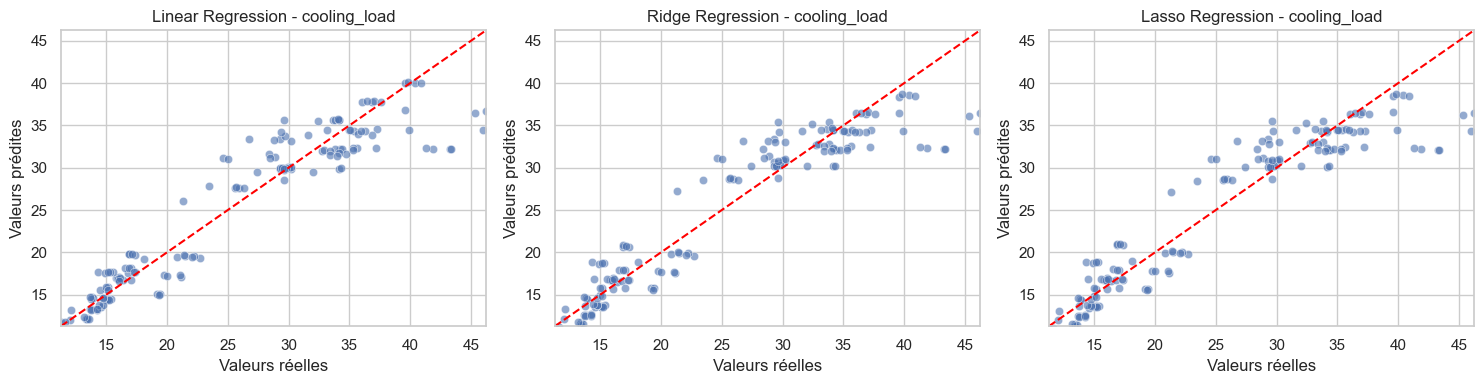

In [51]:

models = {
    "Linear Regression": Y_pred_lr,
    "Ridge Regression": Y_pred_ridge,
    "Lasso Regression": Y_pred_lasso
}

targets = Y_train.columns

# Création des plots
for target_idx, target in enumerate(targets):
    plt.figure(figsize=(15, 4))
    for i, (model_name, Y_pred) in enumerate(models.items()):
        plt.subplot(1, 3, i+1)
        sns.scatterplot(x=Y_test.iloc[:, target_idx], y=Y_pred[:, target_idx], alpha=0.6)
        plt.plot([Y_test.iloc[:, target_idx].min(), Y_test.iloc[:, target_idx].max()],
                 [Y_test.iloc[:, target_idx].min(), Y_test.iloc[:, target_idx].max()],
                 color='red', linestyle='--')
        plt.title(f"{model_name} - {target}")
        plt.xlabel("Valeurs réelles")
        plt.ylabel("Valeurs prédites")
        plt.xlim(Y_test.iloc[:, target_idx].min(), Y_test.iloc[:, target_idx].max())
        plt.ylim(Y_test.iloc[:, target_idx].min(), Y_test.iloc[:, target_idx].max())
    plt.tight_layout()
    plt.show()



In [ ]:
# Interpretation
'''
Analyse exploratoire

* La matrice de corrélation montre que les variables les plus influentes sur la charge de chauffage (heating_load) sont : relative_compactness, surface_area et wall_area.
* Pour la charge de refroidissement (cooling_load), les variables les plus corrélées sont glazing_area et orientation.
* Les histogrammes et boxplots indiquent que les distributions des caractéristiques sont globalement homogènes, avec quelques valeurs extrêmes (outliers), notamment sur roof_area et glazing_area.

Modélisation

* Les modèles testés (Linear, Ridge, Lasso) donnent des performances proches sur les deux cibles, avec un léger avantage pour Linear Regression sur heating_load.
* Les barplots R² et MSE montrent que les modèles expliquent bien la variance globale (R² > 0.88), mais des erreurs subsistent, surtout pour cooling_load.
* Les scatter plots Réel vs Prédit confirment que la majorité des prédictions se situe près de la diagonale, indiquant un bon ajustement global, mais quelques écarts persistent sur les valeurs extrêmes.

Conclusion

* Les caractéristiques architecturales (surface, compacité, vitrage) et d’orientation sont déterminantes pour prédire les charges énergétiques des bâtiments.
* Les modèles linéaires sont suffisants pour obtenir une estimation globale, mais l’utilisation de modèles plus complexes pourrait améliorer la précision sur les cas extrêmes.
* Ce workflow illustre une démarche complète : EDA → Préparation des données → Standardisation → Modélisation → Évaluation → Visualisation.
'''
